In [19]:
from matplotlib import pyplot as plt
import random
import os
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns

In [20]:
results = pd.read_csv('agg_results_mem4_10k.csv')

In [21]:
results.shape

(5730000, 7)

In [22]:
results.insert(2, '2', results['0'].astype(str) + '_' + results['1'].astype(str))
len(results['2'].unique())

573

In [23]:
len(results['ei'].unique())

10000

In [24]:
# ExpId,Trial,Node
# results[['0','1','2','ei','memory','search_cost','tau','6']].sort_values(by=['6'], ascending=False)[0:5]

In [25]:
# Dataset,ExpId,Trial
trial_df = results.groupby(['0','1','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()

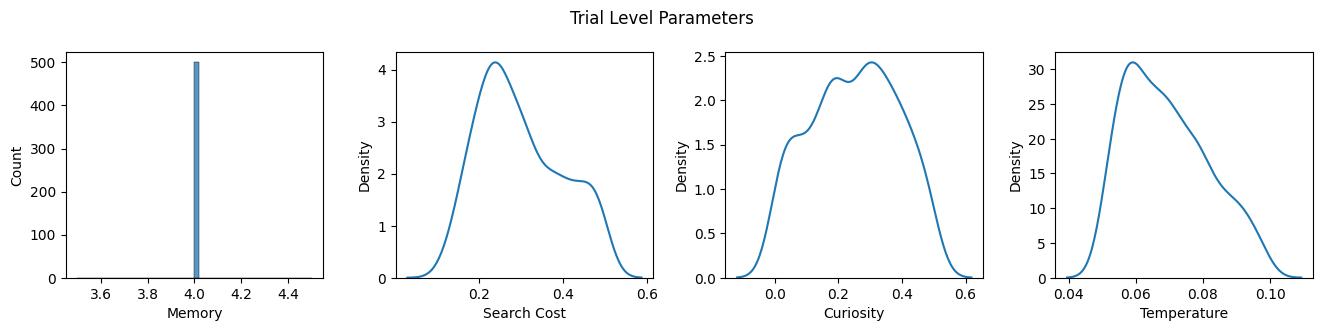

In [26]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('Trial Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_mem4_trial.jpeg')
plt.show()

In [27]:
trial_df.sort_values(by=['6'],ascending=False)

,0,1,ei,memory,search_cost,tau,6
5095343,2041,1,0.267243,4,0.497268,0.050828,-0.001137
5092596,2041,1,0.127266,4,0.488185,0.052741,-0.001981
5094804,2041,1,0.238721,4,0.499642,0.053898,-0.002173
5096233,2041,1,0.311078,4,0.465314,0.052495,-0.002778
5099663,2041,1,0.483387,4,0.459127,0.052842,-0.003358
...,...,...,...,...,...,...,...
2206856,1062,5,0.343216,4,0.175250,0.050192,-1468.096350
2203018,1062,5,0.149700,4,0.077682,0.050572,-1501.979190
2205062,1062,5,0.251740,4,0.054017,0.050595,-1522.506750
2209110,1062,5,0.456278,4,0.049873,0.050538,-1528.890736


In [28]:
top.mean()

0              2041.480000
1                 1.320000
ei                0.249546
memory            4.000000
search_cost       0.297672
tau               0.069366
6                -1.194199
dtype: float64

In [29]:
# Dataset,ExpId
trial_df = results.groupby(['0','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

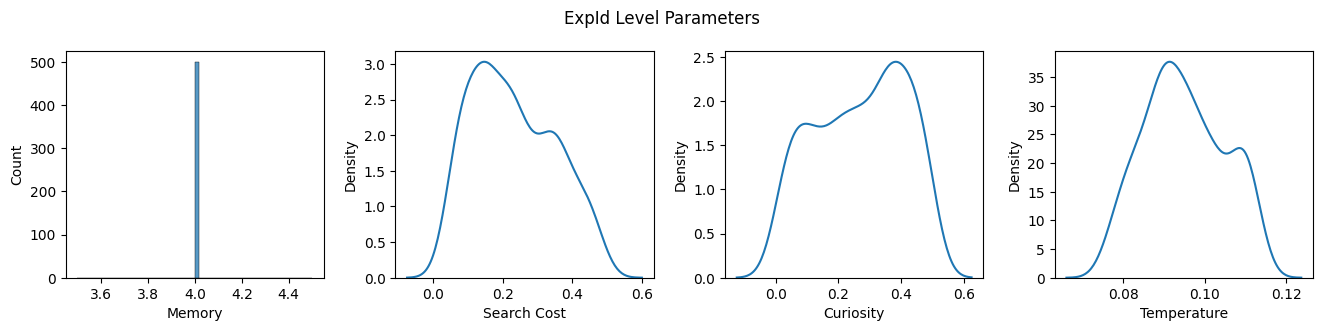

In [30]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('ExpId Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_mem4_expid.jpeg')
plt.show()

In [31]:
trial_df.sort_values(by=['6'],ascending=False)

,0,ei,memory,search_cost,tau,6
665612,2041,0.281653,4,0.189177,0.094986,-21.403545
669006,2041,0.450058,4,0.189270,0.091852,-21.415905
660221,2041,0.010236,4,0.201612,0.090949,-21.422807
661651,2041,0.080479,4,0.167113,0.093597,-21.433455
664414,2041,0.217610,4,0.174671,0.095215,-21.437077
...,...,...,...,...,...,...
265343,1061,0.267243,4,0.497268,0.050828,-1116.464653
62500,1041,0.122258,4,0.424909,0.050920,-1125.940244
135343,1048,0.267243,4,0.497268,0.050828,-1128.251793
64698,1041,0.233819,4,0.426725,0.050300,-1139.917167


In [32]:
top.mean()

0              2045.130000
ei                0.268846
memory            4.000000
search_cost       0.230356
tau               0.095012
6               -22.250956
dtype: float64

In [33]:
# Dataset
trial_df = results.groupby(['ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

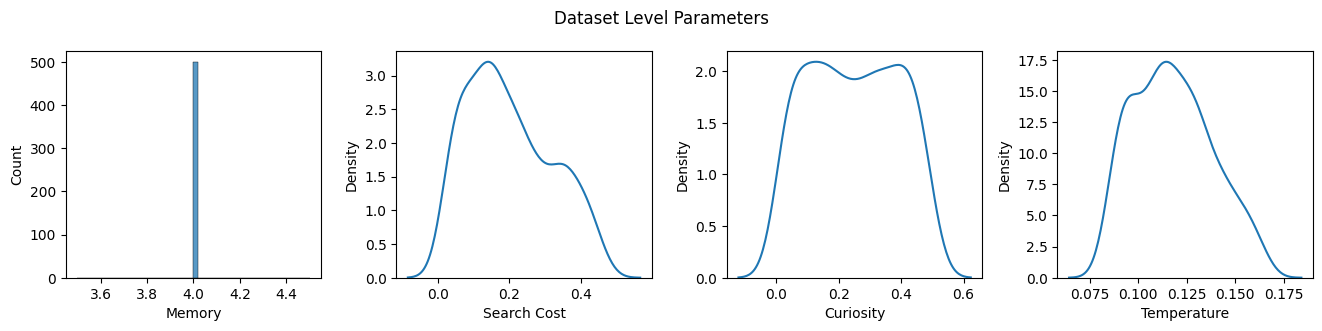

In [34]:
howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.suptitle('Dataset Level Parameters')
plt.tight_layout()
plt.savefig('figures/4panel_mem4_dataset.jpeg')
plt.show()

In [35]:
trial_df.sort_values(by=['6'],ascending=False)

,ei,memory,search_cost,tau,6
9897,0.495510,4,0.126633,0.111600,-233.243598
5130,0.256055,4,0.138366,0.113327,-233.285904
1858,0.090158,4,0.153632,0.107852,-233.346209
274,0.012859,4,0.127750,0.108088,-233.356334
3006,0.148839,4,0.150747,0.111824,-233.416616
...,...,...,...,...,...
6233,0.311078,4,0.465314,0.052495,-432.774973
2596,0.127266,4,0.488185,0.052741,-433.814410
2500,0.122258,4,0.424909,0.050920,-438.940952
4698,0.233819,4,0.426725,0.050300,-444.474982


In [36]:
top.mean()

ei               0.247827
memory           4.000000
search_cost      0.199967
tau              0.117922
6             -248.148073
dtype: float64